In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
data_path = "data/vgsales.csv"
vg_sales = pd.read_csv(data_path)

<IPython.core.display.Javascript object>

For inflation, I’m sure there’s a table out there of price levels paired with their years, then just divide the price by the price level in your table



Possible research questions

    1. 

Variables I want
* 

In [3]:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<IPython.core.display.Javascript object>

In [4]:
vg_sales = vg_sales.dropna()

<IPython.core.display.Javascript object>

In [5]:
eighties = list(range(1980, 1990))
nineties = list(range(1990, 2000))
oughts = list(range(2000, 2010))
tens = list(range(2010, 2020))
twenties = list(range(2020, 2030))

vg_sales["decade"] = "80s"
vg_sales.loc[vg_sales["Year"].isin(nineties), "decade"] = "90s"
vg_sales.loc[vg_sales["Year"].isin(oughts), "decade"] = "00s"
vg_sales.loc[vg_sales["Year"].isin(tens), "decade"] = "10s"
vg_sales.loc[vg_sales["Year"].isin(twenties), "decade"] = "20s"

<IPython.core.display.Javascript object>

In [7]:
|

SyntaxError: invalid syntax (<ipython-input-7-4b37ef281455>, line 1)

ERROR:root:Cannot parse: 1:0: |
Traceback (most recent call last):
  File "C:\Users\dgump\AppData\Roaming\Python\Python37\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "C:\Users\dgump\AppData\Roaming\Python\Python37\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "C:\Users\dgump\AppData\Roaming\Python\Python37\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "C:\Users\dgump\AppData\Roaming\Python\Python37\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:0: |


In [8]:
vg_sales["Genre"].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

<IPython.core.display.Javascript object>

In [9]:
vg_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,decade
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,00s
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80s
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,00s
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,00s
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90s


<IPython.core.display.Javascript object>

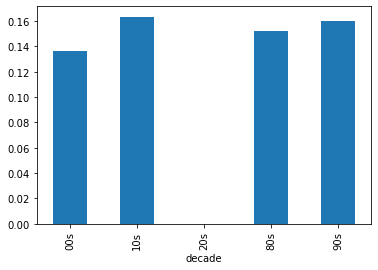

<IPython.core.display.Javascript object>

In [10]:
vg_sales.groupby("decade")["EU_Sales"].mean().plot(kind="bar")

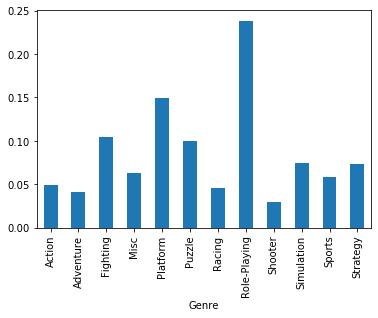

<IPython.core.display.Javascript object>

In [11]:
vg_sales.groupby("Genre")["JP_Sales"].mean().plot(kind="bar")

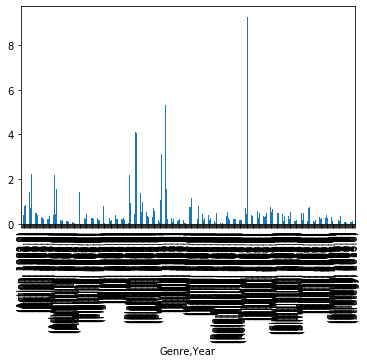

<IPython.core.display.Javascript object>

In [12]:
vg_sales.groupby(["Genre", "Year"])["NA_Sales"].mean().plot(kind="bar")

nineties = list(range(1990, 2000))

vg_sales["90s"] = vg_sales["Year"].isin(nineties)

In [13]:
vg_sales.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,decade
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,00s
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80s
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,00s
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,00s
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90s
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,80s
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,00s
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,00s
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,00s
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,80s


<IPython.core.display.Javascript object>

In [14]:
vg_sales["Platform"].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
# do game prices rise with inflation?
# normalize sales numbers

<IPython.core.display.Javascript object>

In [16]:
# eighties = list(range(1980, 1990))
# nineties = list(range(1990, 2000))
# oughts = list(range(2000, 2010))
# tens = list(range(2010, 2020))
# twenties = list(range(2020, 2030))

<IPython.core.display.Javascript object>

In [17]:
# vg_sales["decade"] = "80s"
# vg_sales.loc[vg_sales["Year"].isin(nineties), "decade"] = "90s"
# vg_sales.loc[vg_sales["Year"].isin(oughts), "decade"] = "00s"
# vg_sales.loc[vg_sales["Year"].isin(tens), "decade"] = "10s"
# vg_sales.loc[vg_sales["Year"].isin(twenties), "decade"] = "20s"

<IPython.core.display.Javascript object>

In [18]:
vg_sales.decade.value_counts()

00s    9183
10s    5133
90s    1769
80s     205
20s       1
Name: decade, dtype: int64

<IPython.core.display.Javascript object>

In [19]:
vg_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,decade
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,00s
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80s
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,00s
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,00s
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90s


<IPython.core.display.Javascript object>

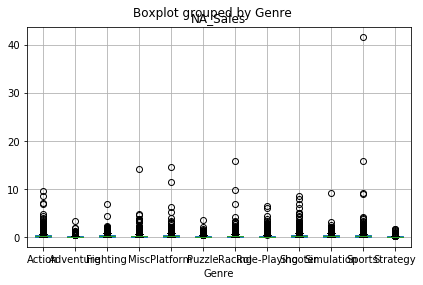

<IPython.core.display.Javascript object>

In [20]:
# is there a difference in the amount of games sold by genre in NA during the 2000's?
na_sales = vg_sales[
    ["Rank", "Name", "Platform", "Year", "Genre", "Publisher", "NA_Sales", "decade"]
]
na_sales00 = na_sales[na_sales["decade"] == "00s"]
na_sales00.boxplot("NA_Sales", by="Genre")
plt.tight_layout()
plt.show()

In [21]:
na_sales.groupby("decade").mean()

,Rank,Year,NA_Sales
decade,,,
00s,8328.065992,2005.540564,0.261703
10s,8904.523086,2012.249562,0.216713
20s,5959.000000,2020.000000,0.270000
80s,3281.458537,1983.931707,1.149561
90s,6892.755229,1996.535331,0.325670


<IPython.core.display.Javascript object>